In [1]:
# Load libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset (train and test sets)
(trainX, trainY), (testX, testY) = mnist.load_data()
print(f'Training data: {trainX.shape} images, Training labels: {trainY.shape}')
print(f'Test data:     {testX.shape} images,    Test labels:     {testY.shape}')
# Example output:
# Training data: (60000, 28, 28) images, Training labels: (60000,)
# Test data:     (10000, 28, 28) images,    Test labels:     (10000,)

# Reshape images to (28,28,1) and convert to float32
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32')
testX  = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32')

# Normalize pixel values from [0,255] to [0,1]
trainX /= 255.0
testX  /= 255.0

# Convert labels to one-hot encoding (10 classes)
trainY = to_categorical(trainY, 10)
testY  = to_categorical(testY, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28) images, Training labels: (60000,)
Test data:     (10000, 28, 28) images,    Test labels:     (10000,)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# 1st convolutional block: 32 filters, 3x3 kernel, ReLU activation
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# 1st pooling layer: 2x2
model.add(MaxPooling2D((2,2)))

# 2nd convolutional block: 64 filters, 3x3 kernel
model.add(Conv2D(64, (3,3), activation='relu'))
# 2nd pooling layer
model.add(MaxPooling2D((2,2)))

# Flatten 2D feature maps to 1D feature vector
model.add(Flatten())
# Fully connected layer with 100 neurons and ReLU
model.add(Dense(100, activation='relu'))
# Output layer: 10 neurons (one per class) with softmax activation
model.add(Dense(10, activation='softmax'))

# Show model summary (optional)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile the model: Adam optimizer and cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model; e.g., 5 epochs, with 10% of data held out for validation
history = model.fit(trainX, trainY, validation_split=0.1, epochs=5, batch_size=128)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.8429 - loss: 0.5480 - val_accuracy: 0.9820 - val_loss: 0.0650
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.9794 - loss: 0.0659 - val_accuracy: 0.9852 - val_loss: 0.0526
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9862 - loss: 0.0438 - val_accuracy: 0.9877 - val_loss: 0.0405
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9905 - loss: 0.0321 - val_accuracy: 0.9908 - val_loss: 0.0362
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9929 - loss: 0.0246 - val_accuracy: 0.9870 - val_loss: 0.0481


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Evaluate accuracy on the test set
test_loss, test_acc = model.evaluate(testX, testY, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%')

# Predict class probabilities for test images
Y_pred = model.predict(testX)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(testY, axis=1)

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


Test accuracy: 98.43%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion Matrix:
 [[ 970    1    0    1    0    1    4    2    1    0]
 [   0 1128    1    1    0    0    1    4    0    0]
 [   3    1  992    3    1    0    0   29    2    1]
 [   0    0    1 1002    0    2    0    4    1    0]
 [   0    0    0    0  966    0    2    1    0   13]
 [   1    0    0    3    0  887    1    0    0    0]
 [   1    2    0    0    3    9  943    0    0    0]
 [   0    0    1    1    0    0    0 1023    0    3]
 [   3    0    0    5    2    4    2    4  933   21]
 [   0    0    0    0    1    4    0    5    0  999]]


In [6]:
# Example: Predict on a few test images
for i in range(5):
    img = testX[i].reshape(1,28,28,1)          # Take one test image
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction, axis=1)[0]
    true_label = np.argmax(testY[i])
    print(f'Image {i}: true label = {true_label}, predicted = {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image 0: true label = 7, predicted = 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image 1: true label = 2, predicted = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image 2: true label = 1, predicted = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 3: true label = 0, predicted = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image 4: true label = 4, predicted = 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8466 - loss: 0.5330 - val_accuracy: 0.9827 - val_loss: 0.0646
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9788 - loss: 0.0697 - val_accuracy: 0.9857 - val_loss: 0.0488
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 0.9863 - val_loss: 0.0466
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9892 - loss: 0.0346 - val_accuracy: 0.9903 - val_loss: 0.0347
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9898 - val_loss: 0.0350

Test Accuracy: 98.93%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


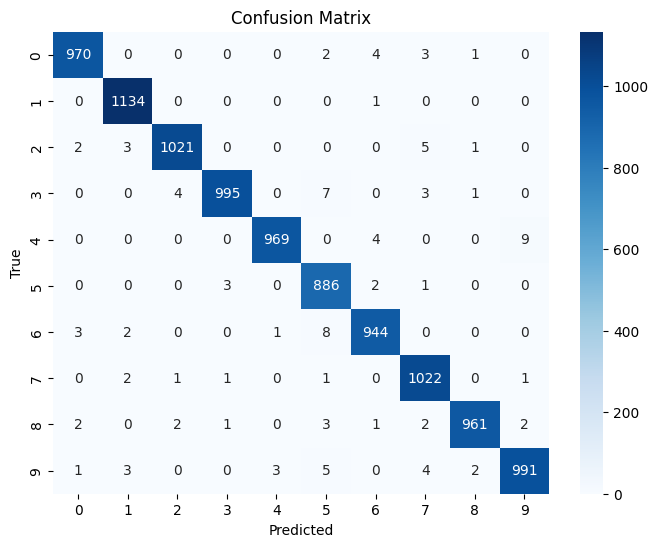


Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 1: True label = 7, Predicted = 7


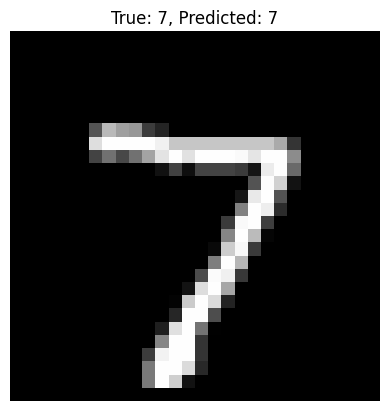

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 2: True label = 2, Predicted = 2


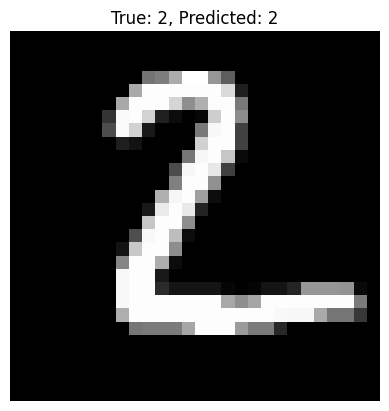

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image 3: True label = 1, Predicted = 1


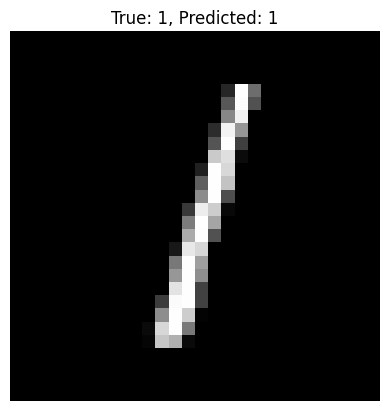

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image 4: True label = 0, Predicted = 0


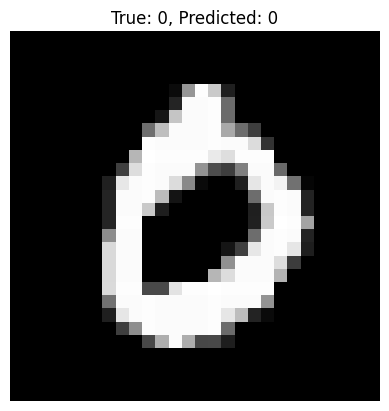

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image 5: True label = 4, Predicted = 4


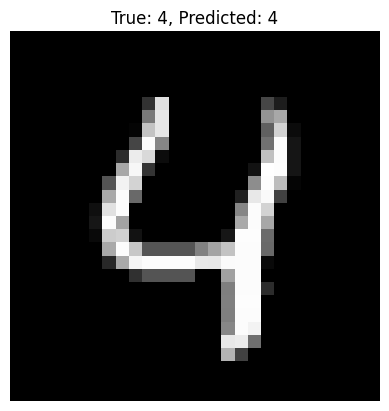

In [7]:
# Handwritten Digit Recognizer using CNN (MNIST)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess MNIST dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255.0
testX  = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255.0
trainY = to_categorical(trainY, 10)
testY  = to_categorical(testY, 10)

# 2. Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile and train model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.1, epochs=5, batch_size=128)

# 4. Evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

# 5. Confusion Matrix
Y_pred = model.predict(testX)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(testY, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 6. Predict on sample images
print("\nSample Predictions:")
for i in range(5):
    img = testX[i].reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(testY[i])
    print(f"Image {i+1}: True label = {true_label}, Predicted = {predicted_label}")
    plt.imshow(testX[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


# Handwritten Digit Recognizer using CNN

## Overview
This project uses a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset.

## Features
- Uses TensorFlow and Keras
- Trained on 60,000 images
- Accuracy: ~99%
- Outputs predictions and confusion matrix

## Instructions
1. Run all cells in the notebook
2. Model will be saved as `mnist_digit_model.h5`

## Author
Abhinav Belhekar


In [8]:
model.save("mnist_digit_model.h5")
